In [40]:

from collections import defaultdict
from dimod import SimulatedAnnealingSampler
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivatives
def f(x):
    return np.sin(2*np.pi*x)

def f_prime_norm(x):
    return np.cos(2*np.pi*x)

def f_second_norm(x):
    return -np.sin(2*np.pi*x)


# def f_second(x):
#     return -4 * (np.pi**2) * np.sin(2 * np.pi * x) -64 * (np.pi**2) *np.cos(8*np.pi*x)

# def f_second_norm(x):
#     res = f_second(x)
#     return res/np.max(abs(res))

# Initial uniform mesh
x_initial = np.linspace(-1, 1, 21)
x_tot = np.linspace(-1, 1, 41)
y_initial = f(x_initial)
# x_mid = np.zeros(9)
# for i in range(9):
#     x_mid[i] = (x_initial[i]+x_initial[i+1])/2


# Initialize our Q matrix
Q = defaultdict(int)

F=21 #max number of nodes
beta = 1 #max number enforcing parameter
alpha = 200 #interference enforcing parameter
#Define the Q matrix
for i in range(41):
    Q[(i,i)] = -1/(f_second_norm(x_tot[i])**2+1/2)+beta*(1-2*F)
    # if i == 0 or i == 49:
    #     Q[(i,i)] = Q[(i,i)]-40
    for j in range(41):
        if i != j and i<j :
            Q[(i,j)] = 2*beta + alpha*max(0, 1/(f_second_norm(x_tot[i])**2+1/2)/30+1/(f_second_norm(x_tot[j])**2+1/2)/30-abs(x_tot[i]-x_tot[j]))

print(Q)


defaultdict(<class 'int'>, {(0, 0): np.float64(-43.0), (0, 1): np.float64(16.528567245454276), (0, 2): np.float64(3.2182933175437145), (0, 3): 2, (0, 4): 2, (0, 5): 2, (0, 6): 2, (0, 7): 2, (0, 8): 2, (0, 9): 2, (0, 10): 2, (0, 11): 2, (0, 12): 2, (0, 13): 2, (0, 14): 2, (0, 15): 2, (0, 16): 2, (0, 17): 2, (0, 18): 2, (0, 19): 2, (0, 20): 2, (0, 21): 2, (0, 22): 2, (0, 23): 2, (0, 24): 2, (0, 25): 2, (0, 26): 2, (0, 27): 2, (0, 28): 2, (0, 29): 2, (0, 30): 2, (0, 31): 2, (0, 32): 2, (0, 33): 2, (0, 34): 2, (0, 35): 2, (0, 36): 2, (0, 37): 2, (0, 38): 2, (0, 39): 2, (0, 40): 2, (1, 1): np.float64(-42.67928508681814), (1, 2): np.float64(11.080193896331345), (1, 3): 2, (1, 4): 2, (1, 5): 2, (1, 6): 2, (1, 7): 2, (1, 8): 2, (1, 9): 2, (1, 10): 2, (1, 11): 2, (1, 12): 2, (1, 13): 2, (1, 14): 2, (1, 15): 2, (1, 16): 2, (1, 17): 2, (1, 18): 2, (1, 19): 2, (1, 20): 2, (1, 21): 2, (1, 22): 2, (1, 23): 2, (1, 24): 2, (1, 25): 2, (1, 26): 2, (1, 27): 2, (1, 28): 2, (1, 29): 2, (1, 30): 2, (1, 31)

In [41]:

# Define the sampler that will be used to run the problem
#sampler = EmbeddingComposite(DWaveSampler())
# Instantiate the sampler
sampler = SimulatedAnnealingSampler()

# Run the problem on the sampler and print the results
sampleset = sampler.sample_qubo(Q,
                                 num_reads = 100)
#print(sampleset) #prints energy, number of occurencies and 
result = sampleset.first.sample #lowest energy sample

#print(first)
#for k in range(9):
    #print(result[k])

x_adapt = [x_tot[k] for k in range(len(x_tot)) if result[k] == 1]

print(x_initial)
print(x_adapt)


[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[np.float64(-1.0), np.float64(-0.85), np.float64(-0.75), np.float64(-0.6499999999999999), np.float64(-0.55), np.float64(-0.3999999999999999), np.float64(-0.29999999999999993), np.float64(-0.25), np.float64(-0.19999999999999996), np.float64(-0.1499999999999999), np.float64(-0.04999999999999993), np.float64(0.10000000000000009), np.float64(0.20000000000000018), np.float64(0.25), np.float64(0.30000000000000004), np.float64(0.40000000000000013), np.float64(0.55), np.float64(0.6500000000000001), np.float64(0.75), np.float64(0.8500000000000001), np.float64(1.0)]


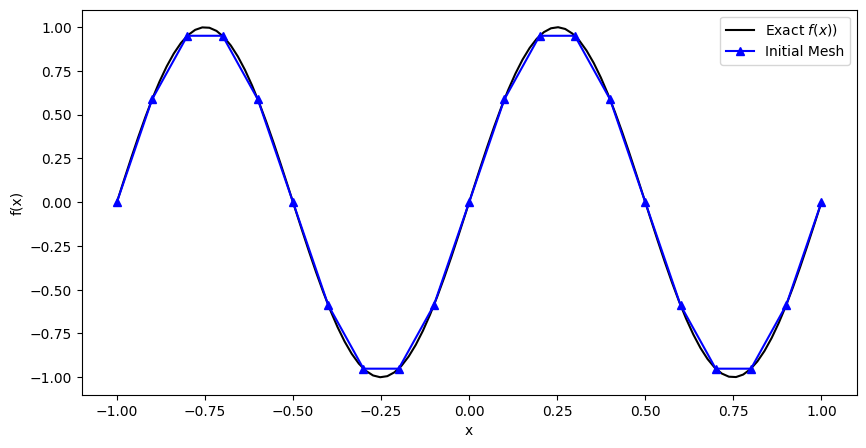

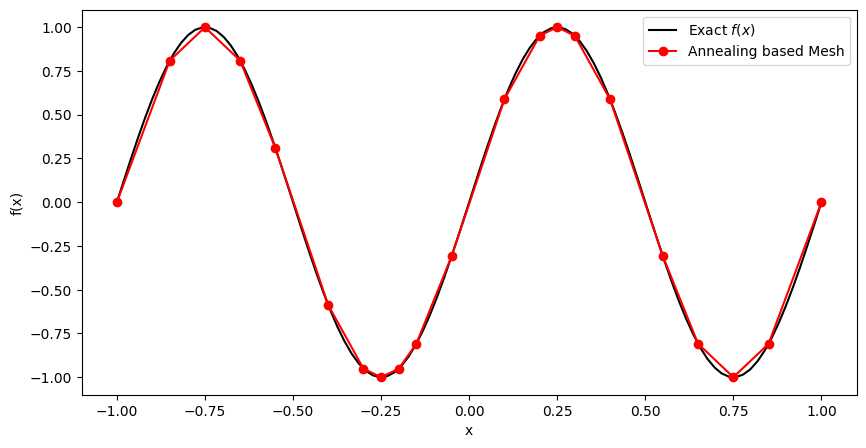

In [42]:

y_adaptive = f(np.array(x_adapt))
# Plotting the initial and adapted meshes
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(-1, 1, 100), f(np.linspace(-1, 1, 100)), 'k-', label="Exact $f(x))$")
plt.plot(x_initial, y_initial, 'b^-', label="Initial Mesh")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")

plt.figure(figsize=(10, 5))
plt.plot(np.linspace(-1, 1, 100), f(np.linspace(-1, 1, 100)), 'k-', label="Exact $f(x)$")
plt.plot(x_adapt, y_adaptive, 'ro-', label="Annealing based Mesh")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

